In [1]:
# Sean Dougherty
# 03/15/2022
# this file reads in the output csv filed from agn_merger.py and does some preliminary visualization
# will later become a .py file for sharing and convinience

In [ ]:
# at the end of csv processing, we want a df with bins as columns and iterations as rows
# we want 3 of these: for pair AGN fraction, iso AGN fraction, and enhancement

In [396]:
# load libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

import os

from time import sleep
from tqdm import tqdm

from multiprocessing import Pool, freeze_support, RLock

data_path = '/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/'

## Checking pair and control galaxy mass and redshift distributions

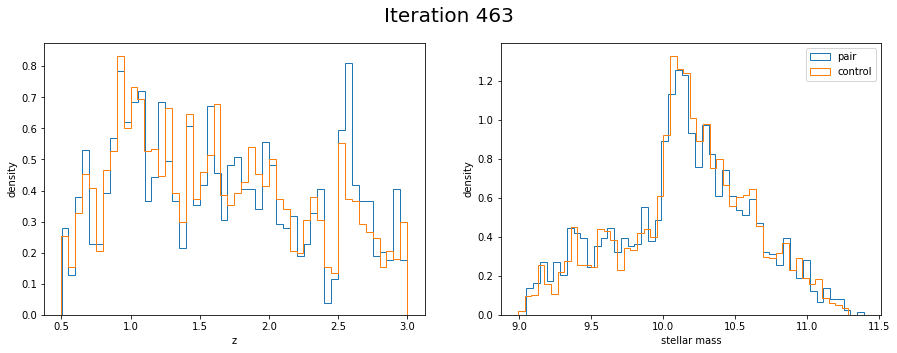

1.6 1.545


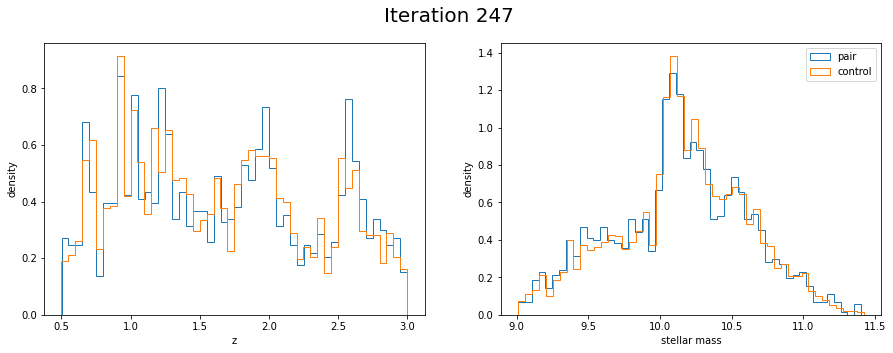

1.645 1.6


In [68]:
# do I want to do this by bin? or per iteration?
# probably best to just randomly choose 2 or 3 iterations to look at this for

#photo-specz_results/photo-specz_'

# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(data_path+'photo-specz_results/')), size=2)

# photo-specz_5.csv

# open each dataframe and plot distributions
for file_idx in idx:
    ran_df = pd.read_csv( data_path+'photo-specz_results/'+(os.listdir(data_path+'photo-specz_results/'))[file_idx] )
    ran_df = ran_df[ (ran_df['prime_drawn_M'] > 10) ]#& (ran_df['field'] != 'GDS') ]
    
    # create arrays for distributions
    histp_z = np.concatenate( (np.array(ran_df['prime_drawn_z']), np.array(ran_df['partner_drawn_z'])), axis=0 )
    histp_M = np.concatenate( (np.array(ran_df['prime_drawn_M']), np.array(ran_df['partner_drawn_M'])), axis=0 )
    
    histc_z = np.concatenate( (np.array(ran_df['prime_control1_drawn_z']), np.array(ran_df['prime_control2_drawn_z']),
                               np.array(ran_df['partner_control1_drawn_z']), np.array(ran_df['partner_control2_drawn_z'])), axis=0 )
    histc_M = np.concatenate( (np.array(ran_df['prime_control1_drawn_M']), np.array(ran_df['prime_control2_drawn_M']),
                               np.array(ran_df['partner_control1_drawn_M']), np.array(ran_df['partner_control2_drawn_M'])), axis=0 )
    
    # make subplots to show mass and z distributions for pair and control galaxies
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    axs[0].hist(histp_z, bins=50, density=True, histtype='step')
    axs[0].hist(histc_z, bins=50, density=True, histtype='step')
    axs[0].set_xlabel('z')
    axs[0].set_ylabel('density')
    #axs[0].title['redshift']
    
    axs[1].hist(histp_M, bins=50, density=True, histtype='step', label='pair')
    axs[1].hist(histc_M, bins=50, density=True, histtype='step', label='control')
    axs[1].legend()
    axs[1].set_xlabel('stellar mass')
    axs[1].set_ylabel('density')
    
    fig.suptitle('Iteration {}'.format(file_idx), fontsize=20)
    
    #axs[1].title('iteration '+str(file_idx))
    plt.show()
    
    print( np.median(histp_z), np.nanmedian(histc_z) )

In [12]:
ran_df

,Unnamed: 0,prime_index,partner_index,arc_sep,mass_ratio,dv,kpc_sep,prime_drawn_z,prime_drawn_M,prime_drawn_LX,partner_drawn_z,partner_drawn_M,partner_drawn_LX,prime_control1_ID,prime_control1_drawn_z,prime_control1_drawn_M,prime_control1_drawn_LX,prime_control2_ID,prime_control2_drawn_z,prime_control2_drawn_M,prime_control2_drawn_LX,partner_control1_ID,partner_control1_drawn_z,partner_control1_drawn_M,partner_control1_drawn_LX,partner_control2_ID,partner_control2_drawn_z,partner_control2_drawn_M,partner_control2_drawn_LX,field,prime_cat_ID,partner_cat_ID,prime_control1_cat_ID,prime_control2_cat_ID,partner_control1_cat_ID,partner_control2_cat_ID
0,371,26,33,8.168008,0.890000,855.820415,66.863729,1.11,10.130000,-99.0,1.10,9.240000,-99.0,2008.0,1.12,10.120000,-99.000,11446.0,1.13,10.140000,-99.0,5187.0,1.07,9.250000,-99.0000,11445.0,1.08,9.270000,-99.0,GDS,40,50,2840.0,17245.0,7649.0,17244.0
1,898,54,40,6.933610,0.510000,-828.742772,56.942380,1.13,10.430000,-99.0,1.14,9.920000,-99.0,9677.0,1.14,10.420000,41.506,16135.0,1.14,10.450000,-99.0,7750.0,1.14,9.940000,-99.0000,2330.0,1.12,9.910000,-99.0,GDS,76,58,14520.0,24427.0,11516.0,3295.0
21,4979,222,209,8.312244,0.270000,863.964871,68.295366,2.28,10.020000,-99.0,2.25,9.750000,-99.0,15019.0,2.26,9.990000,-99.000,12656.0,2.26,10.050000,-99.0,15238.0,2.25,9.720000,-99.0000,9702.0,2.28,9.730000,-99.0,GDS,287,271,22797.0,19135.0,23119.0,14566.0
31,6723,283,239,4.051994,0.970000,-337.317150,33.776159,2.07,10.320000,-99.0,2.08,9.350000,-99.0,3991.0,2.07,10.330000,-99.000,11774.0,2.07,10.290000,-99.0,2684.0,2.07,9.370000,-99.0000,15386.0,2.08,9.320000,-99.0,GDS,366,312,5792.0,17744.0,3791.0,23341.0
73,16047,656,605,10.676728,0.570000,657.134823,85.181552,2.63,10.180000,-99.0,2.60,9.610000,-99.0,5540.0,2.63,10.180000,-99.000,6144.0,2.64,10.160000,-99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GDS,887,822,8177.0,9098.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,657064,19187,19142,3.331600,0.289502,943.690558,26.801883,1.02,10.931966,-99.0,1.01,10.642465,-99.0,14609.0,1.03,10.902547,43.469,17252.0,1.05,10.952792,-99.0,11660.0,1.00,10.669317,42.8141,13295.0,1.05,10.660865,-99.0,UDS,26717,26665,20239.0,23956.0,16165.0,18388.0
10115,659556,19259,18915,9.375980,0.525239,-535.465505,79.410503,1.56,10.089905,-99.0,1.57,9.564666,-99.0,12148.0,1.57,10.093422,-99.000,16929.0,1.54,10.089905,-99.0,1750.0,1.56,9.571709,-99.0000,15180.0,1.55,9.557507,-99.0,UDS,26809,26344,16821.0,23475.0,2597.0,21038.0
10124,664175,19400,19096,8.550867,0.712981,338.939369,65.985838,2.98,10.100371,-99.0,2.96,9.387390,-99.0,4331.0,2.99,10.117271,-99.000,8769.0,2.97,10.120574,-99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UDS,26997,26595,6159.0,12181.0,NaN,NaN
10139,666532,19465,16825,2.800840,0.917091,-447.740425,23.682281,1.75,10.462398,-99.0,1.76,9.545307,-99.0,18656.0,1.76,10.442480,-99.000,250.0,1.76,10.428135,-99.0,16577.0,1.79,9.550228,-99.0000,1132.0,1.75,9.514548,-99.0,UDS,27088,23324,25980.0,410.0,22991.0,1710.0


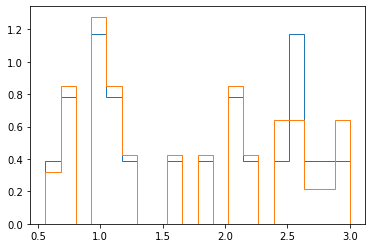

In [136]:
# test_df = pd.read_csv('/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/photoz_TEST.csv')
ran_df = ran_df[ ran_df['kpc_sep'] < 20 ]
pairz = np.concatenate( (np.array(ran_df['prime_drawn_z']), np.array(ran_df['partner_drawn_z'])), axis=0 )
isoz =  np.concatenate( (np.array(ran_df['prime_control1_drawn_z']), np.array(ran_df['prime_control2_drawn_z']),
                       np.array(ran_df['partner_control1_drawn_z']), np.array(ran_df['partner_control2_drawn_z'])), axis=0 )
pairm = np.concatenate( (np.array(ran_df['prime_drawn_M']), np.array(ran_df['partner_drawn_M'])), axis=0 )
isom =  np.concatenate( (np.array(ran_df['prime_control1_drawn_M']), np.array(ran_df['prime_control2_drawn_M']),
                       np.array(ran_df['partner_control1_drawn_M']), np.array(ran_df['partner_control2_drawn_M'])), axis=0 )
x, bins, patches = plt.hist(pairz, bins=20, density=True, histtype='step')
plt.hist(isoz, bins=bins, density=True, histtype='step')
plt.show()

In [ ]:
ran_df2 = ran_df[ (ran_df['prime_drawn_LX'] > 42) ]
ran_df3 = ran_df[ (ran_df['partner_drawn_LX'] > 42) ]

ran_df4 = ran_df[ (ran_df['prime_control1_drawn_LX'] > 42) ]
ran_df5 = ran_df[ (ran_df['prime_control2_drawn_LX'] > 42) ]
ran_df6 = ran_df[ (ran_df['partner_control1_drawn_LX'] > 42) ]
ran_df7 = ran_df[ (ran_df['partner_control2_drawn_LX'] > 42) ]

# print(ran_df2['prime_index'])
# print(ran_df3['partner_index'])
# print(ran_df4['prime_control1_ID'])
# print(ran_df5['prime_control2_ID'])
# print(ran_df6['partner_control1_ID'])
# print(ran_df7['partner_control2_ID'])


## Galaxy property checks

In [364]:
# For a random single iteration, plot the distribution of mass in each bin

# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(data_path+'photoz_results/')))
idx=429
# generate bins
max_dist = 100
n_bins = 8
bins, bin_all_pairfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count = make_bins(max_dist=max_dist, n_bins=n_bins)

# create dictionaries to store redshift and mass distributions
bin_AGN = {}
bin_pairfrac_mass = {}
bin_isofrac_mass = {}
bin_pairfrac_z = {}
bin_isofrac_z = {}

bin_pid = {}
bin_cid = {}

it_df = pd.read_csv( data_path+'photoz_results/'+(os.listdir(data_path+'photoz_results/'))[idx] )
print(idx)

# it_df = pd.read_csv(data_path+'photoz_results/'+file)
it_df = it_df[ (it_df['field'] != 'GDS') & (it_df['prime_drawn_M'] > 9.5)  ]
    
# separate pairs into bins
for rnge in bins:
    # get bin ranges from bins dictionary entries
    info = bins[rnge].split('-')
    low = float(info[0])
    high = float(info[1])

    # sort into bins
    bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]

    # print(len(bin_df[ (bin_df['prime_drawn_LX'] > 42) ]) , bin_df['prime_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_drawn_LX'] > 42) ]) , bin_df['partner_drawn_LX'].count())
    # print('-----')
    # print(len(bin_df[ (bin_df['prime_control1_drawn_LX'] > 42) ]), bin_df['prime_control1_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['prime_control2_drawn_LX'] > 42) ]), bin_df['prime_control2_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_control1_drawn_LX'] > 42) ]), bin_df['partner_control1_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_control2_drawn_LX'] > 42) ]), bin_df['partner_control2_drawn_LX'].count())
    # print('----------------------')
    
    # get pair distributions for mass and redshift in each bin
    bin_pairfrac_mass['pair_mass_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_drawn_M']), 
                                                               np.array(bin_df.loc[:, 'partner_drawn_M'])), axis=0 )
    bin_pairfrac_z['pair_z_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_drawn_z']), 
                                                               np.array(bin_df.loc[:, 'partner_drawn_z'])), axis=0 )
    bin_isofrac_mass['iso_mass_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_drawn_M']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_drawn_M']),
                                                           np.array(bin_df.loc[:, 'partner_control1_drawn_M']),
                                                           np.array(bin_df.loc[:, 'partner_control2_drawn_M'])), axis=0 )
    bin_isofrac_z['iso_z_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_drawn_z']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_drawn_z']),
                                                           np.array(bin_df.loc[:, 'partner_control1_drawn_z']),
                                                           np.array(bin_df.loc[:, 'partner_control2_drawn_z'])), axis=0 )
    bin_pid['pid_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_index']), 
                                                               np.array(bin_df.loc[:, 'partner_index'])), axis=0 )
    bin_cid['cid_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_ID']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_ID']),
                                                           np.array(bin_df.loc[:, 'partner_control1_ID']),
                                                           np.array(bin_df.loc[:, 'partner_control2_ID'])), axis=0 )


429


In [365]:
len(bin_df['partner_control1_ID'])

349

In [366]:
aa = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'prime_index'])
print(aa)

[]


In [367]:
bb = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'prime_control1_ID'])

cc = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'partner_control1_ID'])

In [368]:
# check for duplicate indices
for idx in aa:
    if idx in bb or idx in cc:
        print('oops')

In [369]:
pmass = [ (bin_pairfrac_mass[col]) for col in bin_pairfrac_mass]
pz = [ (bin_pairfrac_z[col]) for col in bin_pairfrac_z]
imass = [ (bin_isofrac_mass[col])[~np.isnan(bin_isofrac_mass[col])] for col in bin_isofrac_mass]
iz = [ (bin_isofrac_z[col])[~np.isnan(bin_isofrac_z[col])] for col in bin_isofrac_z]

# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

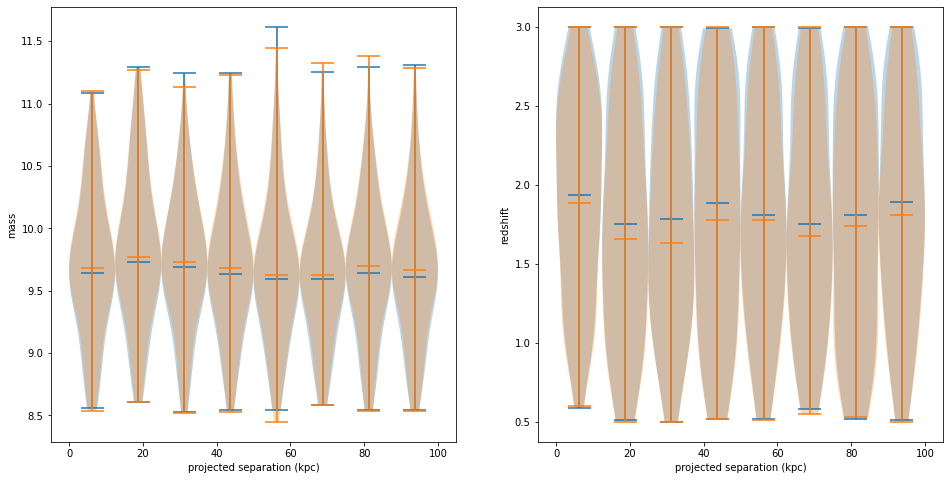

In [370]:
# make violin plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(pmass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[0].violinplot(imass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
# axs[0].set_title('Results', fontsize=20)
axs[0].axis(xmin=-5,xmax=105)
axs[0].set_xlabel('projected separation (kpc)')
axs[0].set_ylabel('mass')

axs[1].violinplot(pz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].violinplot(iz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].axis(xmin=-5,xmax=105)
axs[1].set_xlabel('projected separation (kpc)')
axs[1].set_ylabel('redshift')

plt.show()


## Calculate AGN fractions

In [375]:
# create bins
max_dist = 100
n_bins = 8
bins, bin_all_pairfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count = make_bins(max_dist=max_dist, n_bins=n_bins)

# define X-ray luminosity AGN limit
LX_AGN = 42

# create dictionaries to store AGN fractions
bin_AGN = {}
bin_pairfrac = {}
bin_isofrac = {}

# data_path2 = 'photo-specz_results/q_zspec_gt_1/'
data_path2 = 'photoz_results/'

# read through all the iteration files
for file in tqdm(os.listdir(data_path+data_path2)):
    it_df = pd.read_csv(data_path+data_path2+file)
    it_df = it_df[ (it_df['prime_drawn_M'] > 10) & (it_df['prime_drawn_z'] < 3.0) ]# & (it_df['field'] != 'GDS') ]# &
                #(it_df['mass_ratio'] < 0.40)]
        
    # separate pairs into bins
    for rnge in bins:
        # get bin ranges from bins dictionary entries
        info = bins[rnge].split('-')
        low = float(info[0])
        high = float(info[1])
        
        # sort into bins
        bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]
        
        # print(len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) , bin_df['prime_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ]) , bin_df['partner_drawn_LX'].count())
        # print('-----')
        # print(len(bin_df[ (bin_df['prime_control1_drawn_LX'] > LX_AGN) ]), bin_df['prime_control1_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['prime_control2_drawn_LX'] > LX_AGN) ]), bin_df['prime_control2_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_control1_drawn_LX'] > LX_AGN) ]), bin_df['partner_control1_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_control2_drawn_LX'] > LX_AGN) ]), bin_df['partner_control2_drawn_LX'].count())
        # print('----------------------')
        
        
        # print(np.array(bin_df.loc[ (bin_df['prime_drawn_LX'] > LX_AGN), 'prime_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_drawn_LX'] > LX_AGN), 'partner_cat_ID']) )
        # print('-----')
        # print(np.array(bin_df.loc[ (bin_df['prime_control1_drawn_LX'] > LX_AGN), 'prime_control1_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['prime_control2_drawn_LX'] > LX_AGN), 'prime_control2_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_control1_drawn_LX'] > LX_AGN), 'partner_control1_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_control2_drawn_LX'] > LX_AGN), 'partner_control2_cat_ID' ]))
        # print('----------------------')
        
        
        # calculate the AGN fraction in that bin and append it to same calculation accross iteration
        bin_pairfrac[bins[rnge]] = ((  len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) +
                                             len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ])
                                            ) /
                                            (  bin_df['prime_drawn_LX'].count() +
                                             bin_df['partner_drawn_LX'].count()
                                            ))
        bin_all_pairfrac[bins[rnge]].append(bin_pairfrac[bins[rnge]])

        
        bin_isofrac[bins[rnge]] = ((  len(bin_df[ (bin_df['prime_control1_drawn_LX'] > LX_AGN) ] ) +
                                            len(bin_df[ (bin_df['prime_control2_drawn_LX'] > LX_AGN) ]) +
                                            len(bin_df[ (bin_df['partner_control1_drawn_LX'] > LX_AGN) ]) +
                                            len(bin_df[ (bin_df['partner_control2_drawn_LX'] > LX_AGN) ]) 
                                           ) /
                                            (  bin_df['prime_control1_drawn_LX'].count() +
                                             bin_df['prime_control2_drawn_LX'].count() +
                                             bin_df['partner_control1_drawn_LX'].count() +
                                             bin_df['partner_control2_drawn_LX'].count() ))
        bin_all_isofrac[bins[rnge]].append(bin_isofrac[bins[rnge]])
        
        # store simple counts
        bin_AGN_count[bins[rnge]].append(len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) +
                                             len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ]))
        
        bin_gal_count[bins[rnge]].append(bin_df['prime_drawn_LX'].count() +
                                             bin_df['partner_drawn_LX'].count())

100%|██████████| 500/500 [00:36<00:00, 13.78it/s]


In [376]:
def make_bins(max_dist=100, n_bins=10):

    bin_all_AGNfrac = {}
    bin_all_isofrac = {}
    
    # create dictionaries to store AGN and pair galaxy counts -> just for paried galaxies (controls later)
    bin_AGN_count = {}
    bin_gal_count = {}

    # create bin sizes
    all_bins = {}
    for bn in range(0, n_bins):
        # define limits for each bin
        all_bins[str(bn)] = str((max_dist/n_bins)*bn)+'-'+str((max_dist/n_bins)+(max_dist/n_bins)*bn)
        # define empty lists to later append AGN fractions to
        bin_all_AGNfrac[all_bins[str(bn)]] = []
        bin_all_isofrac[all_bins[str(bn)]] = []
        bin_AGN_count[all_bins[str(bn)]] = []
        bin_gal_count[all_bins[str(bn)]] = []
        
    
    return all_bins, bin_all_AGNfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count

In [377]:
# create dataframes from the dictionaries:
pAGNf_df = pd.DataFrame.from_dict(bin_all_pairfrac)
iAGNf_df = pd.DataFrame.from_dict(bin_all_isofrac)

In [378]:
pAGNf_df.describe()

,0.0-12.5,12.5-25.0,25.0-37.5,37.5-50.0,50.0-62.5,62.5-75.0,75.0-87.5,87.5-100.0
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.075375,0.040944,0.037968,0.052270,0.061124,0.035244,0.049900,0.043016
std,0.029177,0.014507,0.012978,0.016753,0.015801,0.011566,0.014063,0.011599
min,0.012500,0.006250,0.006173,0.015789,0.015464,0.009009,0.012605,0.014815
25%,0.055556,0.030864,0.028736,0.040856,0.050997,0.027237,0.040873,0.035139
50%,0.072479,0.040000,0.037367,0.050597,0.060923,0.034483,0.048780,0.042636
75%,0.092882,0.050000,0.045977,0.062500,0.072179,0.042453,0.058651,0.050000
max,0.191176,0.092593,0.083333,0.106250,0.109756,0.067568,0.093750,0.085470


In [379]:
iAGNf_df.describe()

,0.0-12.5,12.5-25.0,25.0-37.5,37.5-50.0,50.0-62.5,62.5-75.0,75.0-87.5,87.5-100.0
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.070268,0.051965,0.050858,0.055577,0.056932,0.050986,0.052939,0.045317
std,0.023627,0.013084,0.012662,0.012997,0.012745,0.011079,0.010454,0.009127
min,0.011905,0.016722,0.014235,0.023077,0.020202,0.021053,0.024490,0.018307
25%,0.054795,0.043321,0.041667,0.046965,0.048249,0.043080,0.045817,0.039103
50%,0.069810,0.051399,0.050825,0.054745,0.056555,0.050618,0.051913,0.044805
75%,0.085770,0.060896,0.059722,0.063685,0.065427,0.058857,0.059068,0.050748
max,0.184000,0.098113,0.094156,0.109333,0.115578,0.083521,0.093023,0.073840


In [380]:
### photo ###
#0.030469	0.017197	0.014310	0.017071	0.017050	0.012333	0.014314	0.011376
#0.030444	0.016769	0.014832	0.017431	0.018136	0.011767	0.014715	0.011397
### photo+spec ###
#0.024890	0.015904	0.012903	0.014925	0.016148	0.011903	0.013837	0.010741
#0.023732	0.014565	0.013229	0.016505	0.016001	0.011962	0.014264	0.010781

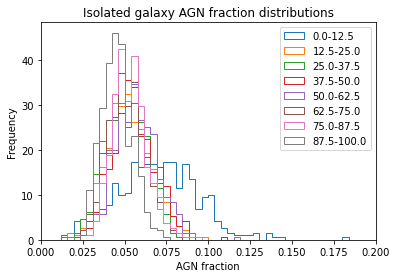

In [381]:
# plot distributions
iAGNf_df.plot.hist(bins=45, histtype='step', density=True)

plt.title('Isolated galaxy AGN fraction distributions')
plt.xlabel('AGN fraction')
plt.xlim(0, 0.2)
plt.show()

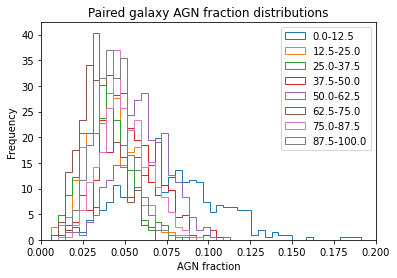

In [382]:
pAGNf_df.plot.hist(bins=45, histtype='step', density=True)
plt.xlim(0, 0.20)
plt.title('Paired galaxy AGN fraction distributions')
plt.xlabel('AGN fraction')
plt.show()

In [383]:
# make AGN fraction vectors
pdata = [pAGNf_df[col] for col in pAGNf_df]
idata = [iAGNf_df[col] for col in pAGNf_df]

# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

# define violin plot width
vwidth = float((bins['0'].split('-'))[1]) - float((bins['0'].split('-'))[0])

# make an AGN enhancment vector
# quick way to get rid of dividing by 0 issue, will need to address later

for j in range(0,len(idata)):
    for k in range(0, len(idata[j])):
        if idata[j][k] == 0:
            idata[j][k] = 1000
            
for j in range(0,len(idata)):
    for k in range(0, len(idata[j])):
        if idata[j][k] == 1000:            
            idata[j][k] = min(idata[j])
            print('here')
        


AGN_enh = [(pdata[i] / idata[i]) for i in range(0, len(pdata))]

# should make some dynamic vector in case I want to increase pair sample out to 150 kpc or something

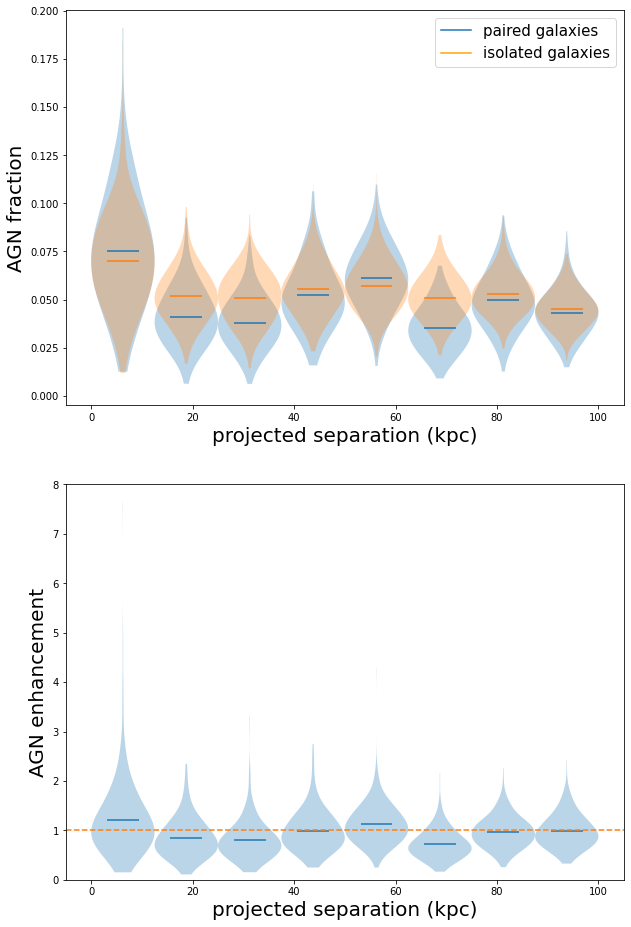

In [384]:
# make violin plots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 16))
axs[0].violinplot(pdata, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[0].violinplot(idata, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
# axs[0].set_title('Results', fontsize=20)
axs[0].axis(xmin=-5,xmax=105)
axs[0].axis(ymin=-0.005)
axs[0].set_xlabel('projected separation (kpc)', fontsize=20)
axs[0].set_ylabel('AGN fraction', fontsize=20)
axs[0].plot([-10,-10], color='#1f77b4', label='paired galaxies')
axs[0].plot([-10,-10], color='orange', label='isolated galaxies')
axs[0].legend(fontsize=15)

axs[1].violinplot(AGN_enh, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[1].plot([-5,105], [1,1], linestyle='--')
axs[1].axis(xmin=-5,xmax=105)
axs[1].axis(ymin=0, ymax=8)
axs[1].set_xlabel('projected separation (kpc)', fontsize=20)
axs[1].set_ylabel('AGN enhancement', fontsize=20)

plt.show()



In [385]:
# show average out counts from the bins and output as a simple df
# copy the bin_gal_count distributions to use later
bin_gal_count_copy = bin_gal_count.copy()
for rnge in bins:
    bin_AGN_count[str(bins[rnge])] = [np.mean(bin_AGN_count[str(bins[rnge])])]
    bin_gal_count[str(bins[rnge])] = [np.mean(bin_gal_count[str(bins[rnge])])]
# print(bin_gal_count)
AGN_count_df = pd.DataFrame.from_dict(bin_AGN_count)
gal_count_df = pd.DataFrame.from_dict(bin_gal_count)
df = pd.concat([AGN_count_df,gal_count_df], ignore_index = True, axis=0)
df

,0.0-12.5,12.5-25.0,25.0-37.5,37.5-50.0,50.0-62.5,62.5-75.0,75.0-87.5,87.5-100.0
0,4.816,6.642,6.718,9.036,12.576,7.894,12.060,11.552
1,64.048,162.336,176.556,172.524,206.028,223.964,242.032,268.256


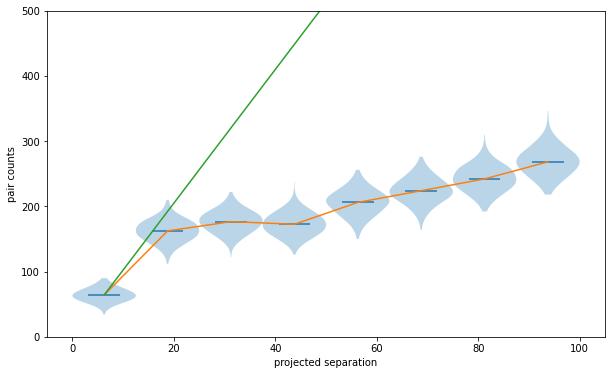

In [386]:
# fit data to natural scaling of areas of successive disks
ra = max_dist / n_bins
rn = np.arange(0,max_dist+max_dist/n_bins,max_dist/n_bins)
# create a list to store scaled pair numbers
np_scaled = []
# number of pairs in the inner circle -> do just the median now
np_a = df[bins['0']].iloc[1]
for n in range(0, len(bins)+1): 
    # Area ratio to center circle
    pnA = ( (n*ra)**2 - ((n-1)*ra)**2 ) / (ra**2)
    np_scaled.append(pnA*np_a)
# plt.plot(rn,np_a)

# I don't this will be helpful, we can plot them 
pcdata = [bin_gal_count_copy[col] for col in bin_gal_count_copy]
pair_counts = df.iloc[1].to_numpy()
fig = plt.figure(figsize=(10,6))

plt.violinplot(pcdata, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
plt.plot(kpc_meds, pair_counts)
plt.plot(kpc_meds, np_scaled[1:])
plt.xlabel('projected separation')
plt.ylabel('pair counts')
plt.ylim(0,500)

plt.show()

In [91]:
it_df.loc[it_df['mass_ratio'] < 0.4]

,Unnamed: 0,prime_index,partner_index,arc_sep,mass_ratio,dv,kpc_sep,prime_drawn_z,prime_drawn_M,prime_drawn_LX,partner_drawn_z,partner_drawn_M,partner_drawn_LX,prime_control1_ID,prime_control1_drawn_z,prime_control1_drawn_M,prime_control1_drawn_LX,prime_control2_ID,prime_control2_drawn_z,prime_control2_drawn_M,prime_control2_drawn_LX,partner_control1_ID,partner_control1_drawn_z,partner_control1_drawn_M,partner_control1_drawn_LX,partner_control2_ID,partner_control2_drawn_z,partner_control2_drawn_M,partner_control2_drawn_LX,field,prime_cat_ID,partner_cat_ID,prime_control1_cat_ID,prime_control2_cat_ID,partner_control1_cat_ID,partner_control2_cat_ID
0,109,10,17,7.485035,0.140000,0.000000,60.768625,2.4300,9.830000,-4.597737e+60,2.4300,9.690000,-4.597737e+60,7250.0,2.4200,9.840000,-4.551908e+60,4210.0,2.4200,9.820000,-4.551908e+60,4212.0,2.37,9.600000,-4.326686e+60,16108.0,2.3500,9.600000,-4.238422e+60,GDS,15,24,10602.0,6021.0,6024.0,24206.0
2,1094,66,17829,11.103500,0.340000,0.000000,93.780877,1.7900,9.320000,-2.178322e+60,1.7900,8.980000,-2.178322e+60,2150.0,1.7684,9.310000,-4.878225e+60,1594.0,1.7600,9.300000,-2.089688e+60,744.0,1.80,8.990000,-2.208342e+60,4998.0,1.8000,9.000000,-2.208342e+60,GDS,87,26863,2989.0,2211.0,997.0,7231.0
5,3017,161,182,8.362150,0.070000,189.030337,68.365170,1.1024,9.250000,-6.545601e+59,1.1002,9.180000,-6.112742e+59,5271.0,1.1100,9.250000,-6.693837e+59,38.0,1.1200,9.240000,-6.844061e+59,6312.0,1.10,9.180000,-6.545601e+59,1552.0,1.0977,9.180000,-5.972380e+59,GDS,218,244,7649.0,50.0,9205.0,2149.0
8,3961,198,190,8.966434,0.390000,-778.465223,73.095214,2.3800,9.910000,-4.371209e+60,2.4100,9.520000,-4.506341e+60,15435.0,2.3800,9.920000,-4.371209e+60,3531.0,2.3700,9.900000,-4.326686e+60,12660.0,2.38,9.500000,-4.371209e+60,1922.0,2.3800,9.570000,-4.371209e+60,GDS,263,253,23246.0,4985.0,19027.0,2682.0
10,4882,226,177,9.905471,0.070000,-837.651944,81.219840,1.1200,9.270000,-6.844061e+59,1.1300,9.200000,-6.996281e+59,11917.0,1.1230,9.270000,-6.399345e+59,4136.0,1.1246,9.280000,-6.693837e+59,13412.0,1.12,9.190000,-6.844061e+59,10732.0,1.1500,9.200000,-7.306737e+59,GDS,301,239,17876.0,5914.0,20165.0,16068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,657212,19230,16807,11.422713,0.046113,0.000000,91.892857,1.0200,9.609594,-5.430338e+59,1.0200,9.563481,-5.430338e+59,10491.0,1.0100,9.593286,-5.299639e+59,16783.0,1.0300,9.588832,-5.562953e+59,3596.0,1.03,9.562293,-5.562953e+59,7484.0,1.0100,9.570543,-5.299639e+59,UDS,26818,23275,14525.0,23239.0,5130.0,10410.0
10180,657522,19240,18925,11.934516,0.332380,715.341737,99.803560,1.2800,9.049218,-9.523975e+59,1.2700,8.716838,-9.340960e+59,2810.0,1.2800,9.037426,-9.523975e+59,8771.0,1.2600,9.049218,-9.160046e+59,7.0,1.26,8.717671,-9.160046e+59,1264.0,1.2500,8.722634,-8.981227e+59,UDS,26831,26397,4077.0,12166.0,19.0,1887.0
10199,664153,19434,16809,11.128052,0.232626,0.000000,70.024063,0.5300,9.531479,-1.093499e+59,0.5300,9.298853,-1.093499e+59,3172.0,0.5300,9.539076,-1.093499e+59,12539.0,0.5400,9.511883,-1.143890e+59,7268.0,0.53,9.281033,-1.093499e+59,117.0,0.5400,9.278754,-1.143890e+59,UDS,27100,23279,4551.0,17350.0,10113.0,206.0
10234,689991,21110,8120,1.392337,0.267397,612.545173,11.506963,2.2000,9.187521,-3.609353e+60,2.1800,8.920123,-3.529829e+60,19970.0,2.2000,9.198657,-3.609353e+60,11668.0,2.2100,9.193125,-3.649496e+60,4433.0,2.18,8.985875,-3.529829e+60,2010.0,2.1600,8.984077,-3.451321e+60,UDS,30830,11275,28345.0,16150.0,6279.0,2934.0


In [28]:
# right now there is not evidence for AGN enhancement
# a few things:
## write code to account for pairs where a partner falls below a mass limit
### simply just say that the prime needs to be greater that 8.5, and any partner needs to be within a mass ratio limit

## seal with duplicate issue where mass ratio = 0, currently some unaccounted for duplicates

## control sampe not exactly representative of the pair sample

## currently, we are using zhi and low values for the mFDa approach, which is not consistent with the draws
### additionally, these are 68% confidence intervals
### will be solved when Dale sends more data
#   - could try making the dz threshold lower
#   - why are the pairs at higher z than expected?
#   - could be the result of poor zhi / zlow cuts (could run one iteration to find out

## could be worth correcting all of the pd warnings now that I fully understand loc...
#   - thought I fixed this but nope

## galaxy duplicate issue in counting AGN -> should be fixed in this code ^
#   - okay but don't we want to not do this before making bin cuts? perhaps it is just safest to select the closest pair
#   - in binning the prime galaxy and include the partner galaxies where in their own bins?
#   - ask Chris what we should do


# let's say the current version of the code is version 1.0
# these tasts will be implemented as different versions


In [154]:
# major issue now is that ID's appear in both the pair and control samples
# could be due to missuse of loc and iloc
# incorrect definitions for pair_df or iso_df

## Create Composite Photo-Z PDF's

In [406]:
# this will only work for photo-z draw only right now
# will need to include some kind of spec-z flag
fields = ['GOODSS','EGS','COSMOS','GOODSN','UDS']
bins = make_bins_PDF(max_dist=max_dist, n_bins=n_bins)

pair_means_all = {}
control_means_all = {}

for key in bins:
    pair_means_all[bins[key]] = np.zeros((81, len(os.listdir(data_path+'photoz_results/'))))
    control_means_all[bins[key]] = np.zeros((81, len(os.listdir(data_path+'photoz_results/'))))

# generate a list of all filenames:
file_list = []
for idx in range(0, len(os.listdir(data_path+'photoz_results/'))):
    file = data_path+'photoz_results/'+(os.listdir(data_path+'photoz_results/'))[idx]
    file_list.append(file)
    
# Create a multiprocessing Pool
pool = Pool()  
# process fields iterable with pool -> parallelize code by field
    
all_data = pool.map(composite_PDFs, file_list)
    
# close pool
pool.close()
pool.join()


In [407]:
# analyze output data and create composite PDFs
# create dictionaries to store means of all iterations
mean_comp_pair_all = {}
mean_comp_control_all = {}

for i in range(0, len(all_data)):
    it = all_data[i]
    pair_dict = it[0]
    control_dict = it[1]
    
    for key in bins:
        pair_means_all[bins[key]][:,i] = pair_dict[bins[key]]
        control_means_all[bins[key]][:,i] = control_dict[bins[key]]
        
# now take means of all the means of each iteration     
for key in bins:
    mean_comp_pair_all[bins[key]] = np.mean(pair_means_all[bins[key]], axis=1)
    mean_comp_control_all[bins[key]] = np.mean(control_means_all[bins[key]], axis=1)


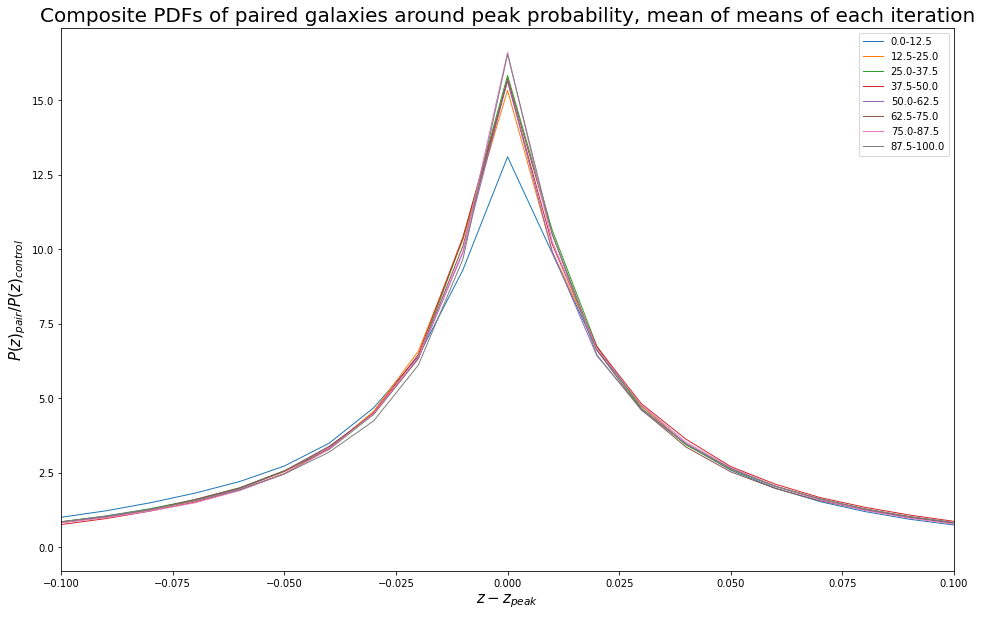

In [413]:
# finally plot
fig = plt.figure(figsize=(16,10))
comp_z = np.arange(-0.4, 0.41, 0.01)

for key in mean_comp_pair_all:
    # plt.plot(comp_z, mean_comp_pair_all[key] / mean_comp_control_all[key], label=key, linewidth=1)
    # plt.plot([-1,1],[1,1], c='black', linestyle='--', linewidth=1)
    # plt.plot([0,0],[-5,5], c='black', linestyle='--', linewidth=1)
    plt.plot(comp_z, mean_comp_pair_all[key], label=key, linewidth=1)
    
    ### seems to be something goin on here... ###
    ### no reason why the PDF widths should be so correlated between pair and control ###

plt.legend(fontsize=10)
plt.xlabel('$z-z_{peak}$', fontsize=15)
plt.ylabel('$P(z)_{pair} / P(z)_{control}$', fontsize=15)
plt.title('Composite PDFs of paired galaxies around peak probability, mean of means of each iteration', fontsize=20)
# plt.xlim(-0.4,0.4)
# plt.ylim(0,2)

plt.xlim(-0.1,0.1)
plt.show()

In [405]:
# make this into a function:
def composite_PDFs(file):

    # take a similar approach as plotting pair/control mass/z distributions but also sort into bins
    # prime_cat_ID	partner_cat_ID	prime_control1_cat_ID	
    # prime_control2_cat_ID	partner_control1_cat_ID	partner_control2_cat_ID

    # create bins -> constants should be the same as when AGN fraction is calculated, so might as well comment out
    max_dist = 100
    n_bins = 8

    # load the random iteration
    ran_df = pd.read_csv(file)
    ran_df = ran_df[ (ran_df['prime_drawn_M'] > 10) & (ran_df['prime_drawn_z'] < 3.0) ]#& (ran_df['field'] != 'GDS') ]
    ran_df = ran_df.fillna('666666666')

    # change field string names and ID so that the filenames can easily be created:
    # do ID first... this was designed kinda poorly on my part...
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 1, 
               'prime_cat_ID' ] = '0000'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 2, 
               'prime_cat_ID' ] = '000'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 3, 
               'prime_cat_ID' ] = '00'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 4, 
               'prime_cat_ID' ] = '0'+(ran_df['prime_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['prime_cat_ID'].astype(int)).astype(str)).str.len()) == 5, 
               'prime_cat_ID' ] = (ran_df['prime_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 1, 
               'partner_cat_ID' ] = '0000'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 2, 
               'partner_cat_ID' ] = '000'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 3, 
               'partner_cat_ID' ] = '00'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 4, 
               'partner_cat_ID' ] = '0'+(ran_df['partner_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ (((ran_df['partner_cat_ID'].astype(int)).astype(str)).str.len()) == 5, 
               'partner_cat_ID' ] = (ran_df['partner_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
               'prime_control1_cat_ID' ] = '0000'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
               'prime_control1_cat_ID' ] = '000'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
               'prime_control1_cat_ID' ] = '00'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
               'prime_control1_cat_ID' ] = '0'+(ran_df['prime_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
               'prime_control1_cat_ID' ] = (ran_df['prime_control1_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
               'prime_control2_cat_ID' ] = '0000'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
               'prime_control2_cat_ID' ] = '000'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
               'prime_control2_cat_ID' ] = '00'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
               'prime_control2_cat_ID' ] = '0'+(ran_df['prime_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['prime_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
               'prime_control2_cat_ID' ] = (ran_df['prime_control2_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
               'partner_control1_cat_ID' ] = '0000'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
               'partner_control1_cat_ID' ] = '000'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
               'partner_control1_cat_ID' ] = '00'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
               'partner_control1_cat_ID' ] = '0'+(ran_df['partner_control1_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
               'partner_control1_cat_ID' ] = (ran_df['partner_control1_cat_ID'].astype(int)).astype(str)

    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 1), 
               'partner_control2_cat_ID' ] = '0000'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 2), 
               'partner_control2_cat_ID' ] = '000'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 3), 
               'partner_control2_cat_ID' ] = '00'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 4), 
               'partner_control2_cat_ID' ] = '0'+(ran_df['partner_control2_cat_ID'].astype(int)).astype(str)
    ran_df.loc[ ((((ran_df['partner_control2_cat_ID'].astype(int)).astype(str)).str.len()) == 5), 
               'partner_control2_cat_ID' ] = (ran_df['partner_control2_cat_ID'].astype(int)).astype(str)


    # now simply the field names
    ran_df.loc[ (ran_df['field'] == 'GDS'), 'field' ] = 'GOODSS'
    ran_df.loc[ (ran_df['field'] == 'COS'), 'field' ] = 'COSMOS'
    ran_df.loc[ (ran_df['field'] == 'GDN'), 'field' ] = 'GOODSN'


    ran_df['PR_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_cat_ID']+'.pzd'
    ran_df['PA_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_cat_ID']+'.pzd'
    ran_df['PRC1_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_control1_cat_ID']+'.pzd'
    ran_df['PRC2_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['prime_control2_cat_ID']+'.pzd'
    ran_df['PAC1_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_control1_cat_ID']+'.pzd'
    ran_df['PAC2_PDF_filename'] = 'ALL_OPTIMIZED_PDFS_'+ran_df['field']+'_ID'+ran_df['partner_control2_cat_ID']+'.pzd'


    # create a dictionary to store the CANDELS ID + field as the PDF filenames
    bin_pair = {}
    bin_control = {}

    # separate pairs into bins
    for rnge in bins:
        # get bin ranges from bins dictionary entries
        info = bins[rnge].split('-')
        low = float(info[0])
        high = float(info[1])

        # sort into bins
        bin_df = ran_df[ (ran_df['kpc_sep'] > low) & (ran_df['kpc_sep'] <= high) ]

        # create lists of the filenames for each bin and drop nan names
        PR_file = np.array(bin_df['PR_PDF_filename'])
        PA_file = np.array(bin_df['PA_PDF_filename'])
        PRC1_file = np.array(bin_df['PRC1_PDF_filename'])
        PRC2_file = np.array(bin_df['PRC2_PDF_filename'])
        PAC1_file = np.array(bin_df['PAC1_PDF_filename'])
        PAC2_file = np.array(bin_df['PAC2_PDF_filename'])
        pairs_file_all = np.concatenate((PR_file, PA_file), axis=0)
        control_file_all = np.concatenate((PRC1_file, PRC2_file, PAC1_file, PAC2_file), axis=0)

        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_GOODSS_ID666666666.pzd')] = np.nan
        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_EGS_ID666666666.pzd')] = np.nan
        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_COSMOS_ID666666666.pzd')] = np.nan
        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_GOODSN_ID666666666.pzd')] = np.nan
        control_file_all[np.where(control_file_all == 'ALL_OPTIMIZED_PDFS_UDS_ID666666666.pzd')] = np.nan

        cleaned_control = np.array([x for x in control_file_all if str(x) != 'nan'])

        bin_pair[bins[rnge]] = pairs_file_all
        bin_control[bins[rnge]] = cleaned_control
        
   # -------------------------------------------------------------------------------------------------------#

   # create a dictionary to store the composites of all of them
    comp_all_pair = {}
    comp_all_control = {}

    for key in bin_pair:
        # fig = plt.figure(figsize=[10,10])
        # plt.title(key)

        # create an array to store the composites for all the gal in this bin
        # will want to select values z_peak +/- 0.5
        comp_bin_pair = np.zeros((81, len(bin_pair[key])))
        comp_bin_control = np.zeros((81, len(bin_control[key])))

        for i, file in enumerate(bin_pair[key]):
            # identify fields based on filename and define z_peak
            file_field_end = file[-15:-12]
            if file_field_end == 'DSS': 
                file_field = 'GOODSS'
                z_peak = float(GDSz_cat.loc[ (GDSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'EGS': 
                file_field = 'EGS'
                z_peak = float(EGSz_cat.loc[ (EGSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'MOS': 
                file_field = 'COSMOS'
                z_peak = float(COSz_cat.loc[ (COSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'DSN': 
                file_field = 'GOODSN'
                z_peak = float(GDNz_cat.loc[ (GDNz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'UDS': 
                file_field = 'UDS'
                z_peak = float(UDSz_cat.loc[ (UDSz_cat['file'] == file), 'HB4_z_peak' ])
            # open PDF for this file:
            pdf_filename = '/nobackup/c1029594/CANDELS_AGN_merger_data/Data - All Fields/'+file_field+'_OPTIMIZED03/'+file
            pdf = pd.read_csv(pdf_filename, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                                      'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')

            pdf['z_adj'] = pdf['z'] - z_peak

            # select the HB4 values where z is 0.5 within the z_peak
            upper = pdf.loc[ (pdf['z_adj'] < 0.401) & (pdf['z_adj'] >= 0), 'HB4' ] 
            lower = pdf.loc[ (pdf['z_adj'] > -0.401) & (pdf['z_adj'] < 0), 'HB4' ] 
            comp_bin_pair[40:(40+len(upper)),i] = upper
            comp_bin_pair[(40-len(lower)):40,i] = lower


            # subtract z_peak from all the z values in pdf
            # plt.plot(pdf['z_adj'], pdf['HB4'], color='g', alpha=0.1)    
            # plt.xlim(-0.5,0.5)
            # plt.xlabel('z')

        # Now for the control galaxies
        for j, file in enumerate(bin_control[key]):
            # identify fields based on filename and define z_peak
            file_field_end = file[-15:-12]
            if file_field_end == 'DSS': 
                file_field = 'GOODSS'
                z_peak = float(GDSz_cat.loc[ (GDSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'EGS': 
                file_field = 'EGS'
                z_peak = float(EGSz_cat.loc[ (EGSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'MOS': 
                file_field = 'COSMOS'
                z_peak = float(COSz_cat.loc[ (COSz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'DSN': 
                file_field = 'GOODSN'
                z_peak = float(GDNz_cat.loc[ (GDNz_cat['file'] == file), 'HB4_z_peak' ])
            if file_field_end == 'UDS': 
                file_field = 'UDS'
                z_peak = float(UDSz_cat.loc[ (UDSz_cat['file'] == file), 'HB4_z_peak' ])
            # open PDF for this file:
            pdf_filename = '/nobackup/c1029594/CANDELS_AGN_merger_data/Data - All Fields/'+file_field+'_OPTIMIZED03/'+file
            pdf = pd.read_csv(pdf_filename, comment='#', names=['z', 'Finkelstein', 'Fontana', 'Pforr', 'Salvato', 'Wiklind',
                                                      'Wuyts', 'HB4', 'mFDa4'], delimiter=' ')

            pdf['z_adj'] = pdf['z'] - z_peak

            # select the HB4 values where z is 0.5 within the z_peak
            upper = pdf.loc[ (pdf['z_adj'] < 0.401) & (pdf['z_adj'] >= 0), 'HB4' ] 
            lower = pdf.loc[ (pdf['z_adj'] > -0.401) & (pdf['z_adj'] < 0), 'HB4' ] 
            comp_bin_control[40:(40+len(upper)),j] = upper
            comp_bin_control[(40-len(lower)):40,j] = lower

        mean_comp_pair = np.mean(comp_bin_pair, axis=1)
        mean_comp_control = np.mean(comp_bin_control, axis=1)

        comp_all_pair[key] = mean_comp_pair
        comp_all_control[key] = mean_comp_control


        #     plt.plot(comp_z, mean_comp, color='r')   
        #     plt.show()
        
    return comp_all_pair, comp_all_control


In [358]:
# control_file_all

In [359]:
# Okay I have the pair and control filenames in each bin, so now I'll just have to load them and overplot
# load in the redshift catalogs for each field]
zPATH = '/nobackup/c1029594/CANDELS_AGN_merger_data/Pair Project - Updated Data/redshift_catalogs.full/'

GDSz_cat = pd.read_csv(zPATH+'zcat_GOODSS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
EGSz_cat = pd.read_csv(zPATH+'zcat_EGS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
COSz_cat = pd.read_csv(zPATH+'zcat_COSMOS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
GDNz_cat = pd.read_csv(zPATH+'zcat_GOODSN_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')
UDSz_cat = pd.read_csv(zPATH+'zcat_UDS_v2.0.cat', comment='#', names=['file','ID','RA','DEC','z_best',
                    'z_best_type','z_spec','z_spec_ref','z_grism','mFDa4_z_peak','mFDa4_z_weight','mFDa4_z683_low',
                    'mFDa4_z683_high','mFDa4_z954_low','mFDa4_z954_high','HB4_z_peak','HB4_z_weight','HB4_z683_low',
                    'HB4_z683_high','HB4_z954_low','HB4_z954_high','Finkelstein_z_peak','Finkelstein_z_weight',
                    'Finkelstein_z683_low','Finkelstein_z683_high','Finkelstein_z954_low','Finkelstein_z954_high',
                    'Fontana_z_peak','Fontana_z_weight','Fontana_z683_low','Fontana_z683_high','Fontana_z954_low',
                    'Fontana_z954_high','Pforr_z_peak','Pforr_z_weight','Pforr_z683_low','Pforr_z683_high',
                    'Pforr_z954_low','Pforr_z954_high','Salvato_z_peak','Salvato_z_weight','Salvato_z683_low',
                    'Salvato_z683_high','Salvato_z954_low','Salvato_z954_high','Wiklind_z_peak','Wiklind_z_weight',
                    'Wiklind_z683_low','Wiklind_z683_high','Wiklind_z954_low','Wiklind_z954_high','Wuyts_z_peak',
                    'Wuyts_z_weight','Wuyts_z683_low','Wuyts_z683_high','Wuyts_z954_low','Wuyts_z954_high'],
                       delimiter=' ')

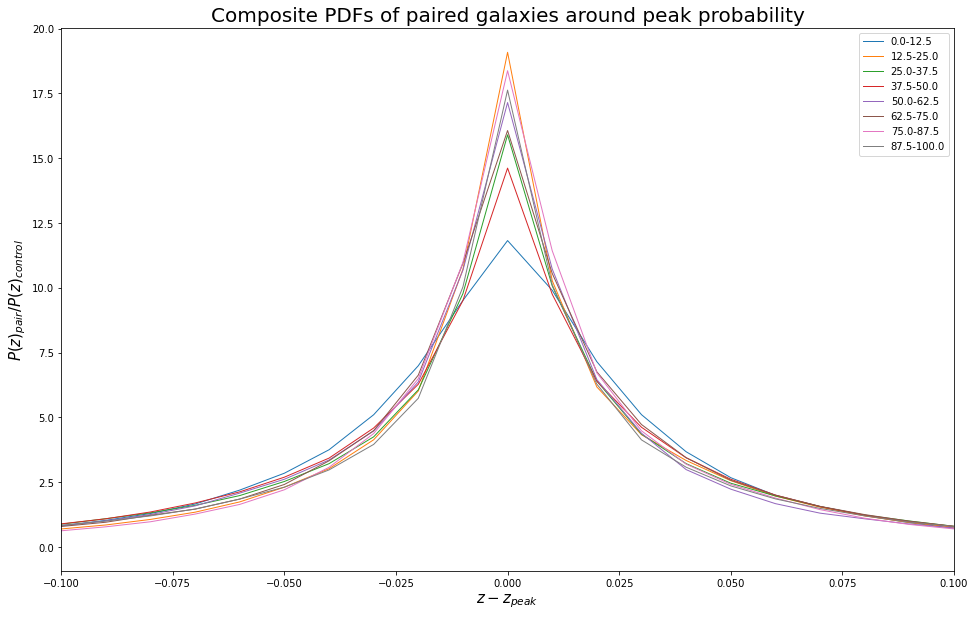

In [374]:
fig = plt.figure(figsize=(16,10))
comp_z = np.arange(-0.4, 0.41, 0.01)

for key in comp_all_pair:
    # plt.plot(comp_z, comp_all_pair[key] / comp_all_control[key], label=key, linewidth=1)
    # plt.plot([-1,1],[1,1], c='black', linestyle='--', linewidth=1)
    # plt.plot([0,0],[-5,5], c='black', linestyle='--', linewidth=1)
    plt.plot(comp_z, comp_all_control[key], label=key, linewidth=1)
    
    ### seems to be something goin on here... ###
    ### no reason why the PDF widths should be so correlated between pair and control ###

plt.legend(fontsize=10)
plt.xlabel('$z-z_{peak}$', fontsize=15)
plt.ylabel('$P(z)_{pair} / P(z)_{control}$', fontsize=15)
plt.title('Composite PDFs of paired galaxies around peak probability', fontsize=20)
# plt.xlim(-0.4,0.4)
# plt.ylim(0,2)

plt.xlim(-0.1,0.1)
plt.show()

In [362]:
# (len((ran_df['prime_cat_ID'].astype(int)).astype(str))) == 1
# ran_df.loc[ (pd.isna(ran_df['prime_control1_cat_ID']) == False) & ((((ran_df['prime_control1_cat_ID'].astype(int)).astype(str)).str.len()) == 1)]

# new idea is to turn every nan value in the DF to '666666666' okay let's rock
ran_df4 = ran_df.fillna(66666666)
ran_df

,Unnamed: 0,prime_index,partner_index,arc_sep,mass_ratio,dv,kpc_sep,prime_drawn_z,prime_drawn_M,prime_drawn_LX,partner_drawn_z,partner_drawn_M,partner_drawn_LX,prime_control1_ID,prime_control1_drawn_z,prime_control1_drawn_M,prime_control1_drawn_LX,prime_control2_ID,prime_control2_drawn_z,prime_control2_drawn_M,prime_control2_drawn_LX,partner_control1_ID,partner_control1_drawn_z,partner_control1_drawn_M,partner_control1_drawn_LX,partner_control2_ID,partner_control2_drawn_z,partner_control2_drawn_M,partner_control2_drawn_LX,field,prime_cat_ID,partner_cat_ID,prime_control1_cat_ID,prime_control2_cat_ID,partner_control1_cat_ID,partner_control2_cat_ID,PR_PDF_filename,PA_PDF_filename,PRC1_PDF_filename,PRC2_PDF_filename,PAC1_PDF_filename,PAC2_PDF_filename
1,489,31,35,6.907845,0.980000,-837.651944,56.640832,1.12,10.130000,-6.844061e+59,1.13,9.150000,-6.996281e+59,11448,1.13,10.14,-6.99628e+59,1968,1.11,10.16,-6.69384e+59,13578,1.16,9.16,-7.46499e+59,6948,1.14,9.12,-7.1505e+59,GOODSS,00040,00044,17245,02793,20534,10246,ALL_OPTIMIZED_PDFS_GOODSS_ID00040.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID00044.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID17245.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID02793.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID20534.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID10246.pzd
2,493,31,39,8.168008,0.890000,-837.651944,66.973525,1.12,10.130000,-6.844061e+59,1.13,9.240000,-6.996281e+59,9757,1.09,10.11,-6.39934e+59,9318,1.08,10.12,-6.25506e+59,11503,1.15,9.2,-7.30674e+59,694,1.15,9.2,-7.30674e+59,GOODSS,00040,00050,14637,13941,17325,00953,ALL_OPTIMIZED_PDFS_GOODSS_ID00040.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID00050.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID14637.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID13941.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID17325.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID00953.pzd
26,7324,316,232,11.991756,0.280000,387.877225,94.259811,2.79,10.050000,-6.424522e+60,2.77,9.770000,-6.313885e+60,2940,2.8,10.04,-6.48025e+60,10353,2.79,10.02,-6.42452e+60,666666666,666666666,666666666,666666666,666666666,666666666,666666666,666666666,GOODSS,00423,00308,04172,15555,666666666,666666666,ALL_OPTIMIZED_PDFS_GOODSS_ID00423.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID00308.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID04172.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID15555.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID666666666.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID666666666.pzd
44,10572,442,477,14.426783,0.840000,0.000000,94.919326,0.58,10.130000,-1.359550e+59,0.58,9.290000,-1.359550e+59,4460,0.56,10.13,-1.24887e+59,212,0.57,10.16,-1.30349e+59,11592,0.58,9.33,-1.35955e+59,8415,0.58,9.33,-1.35955e+59,GOODSS,00606,00652,06497,00278,17453,12508,ALL_OPTIMIZED_PDFS_GOODSS_ID00606.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID00652.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID06497.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID00278.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID17453.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID12508.pzd
47,11487,480,457,7.445339,0.700000,-682.636838,57.681151,2.94,10.570000,-7.289205e+60,2.98,9.870000,-7.530259e+60,11053,2.94,10.6,-7.2892e+60,102,2.98,10.56,-7.53026e+60,10484,2.99,9.86,-7.59122e+60,1141,3,9.81,-7.65245e+60,GOODSS,00655,00624,16671,00139,15760,01604,ALL_OPTIMIZED_PDFS_GOODSS_ID00655.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID00624.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID16671.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID00139.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID15760.pzd,ALL_OPTIMIZED_PDFS_GOODSS_ID01604.pzd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10193,655769,19139,18859,10.736389,0.866994,-515.311497,90.950927,1.60,10.380211,-1.652675e+60,1.61,9.513218,-1.678249e+60,16718,1.55,10.3927,-1.52824e+60,16939,1.54,10.3522,-1.50403e+60,11213,1.6,9.49276,-1.65268e+60,17144,1.59,9.54407,-1.62733e+60,UDS,26636,26237,23116,23447,15496,23733,ALL_OPTIMIZED_PDFS_UDS_ID26636.pzd,ALL_OPTIMIZED_PDFS_UDS_ID26237.pzd,ALL_OPTIMIZED_PDFS_UDS_ID23116.pzd,ALL_OPTIMIZED_PDFS_UDS_ID23447.pzd,ALL_OPTIMIZED_PDFS_UDS_ID15496.pzd,ALL_OPTIMIZED_PDFS_UDS_ID23733.pzd
10194,655775,19139,19052,2.929786,0.327133,0.000000,2

In [310]:
def make_bins_PDF(max_dist=100, n_bins=10):

    # modified version of make_bins that doesn't care about AGN fractions

    # create bin sizes
    all_bins = {}
    for bn in range(0, n_bins):
        # define limits for each bin
        all_bins[str(bn)] = str((max_dist/n_bins)*bn)+'-'+str((max_dist/n_bins)+(max_dist/n_bins)*bn)
    
    return all_bins

In [329]:
# check if they are duplicate:
for rnge in bins:
    aa = comp_all_pair[bins[rnge]]
    bb = comp_all_control[bins[rnge]]
    for idx in aa:
        if idx in bb:
            print('fuck')

In [363]:
print(idx)

429
